### Write a program to use K Means Clustering Algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
132,133,Female,25,72,34
85,86,Male,48,54,46
48,49,Female,29,40,42
153,154,Female,38,78,76
24,25,Female,54,28,14


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

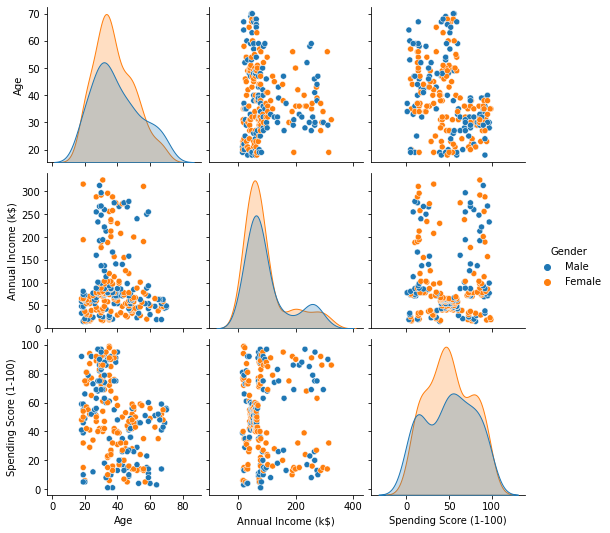

In [20]:
sns.pairplot(df[df.columns.drop('CustomerID')],hue='Gender')
plt.show()

Analysis

    from the figure it is clear that genre has very low effect on other vairables

    They are not inter-correlated

    we can obeserve that there are chances forming clusters with 'Annual Income' & 'Spending Score'

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


In [8]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

In [9]:
X[195]

array([120,  79], dtype=int64)

In [10]:
class KMeansSelf(object):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        # sum of square distances from the closest cluster
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_

In [11]:
ssd1 = []

range_n_clusters = [1, 2, 3, 4, 5 , 7, 8]
for num_clusters in range_n_clusters:
    kmeans1 = KMeansSelf(n_clusters=num_clusters, max_iter=50,random_state=1)

    kmeans1.fit(X)

    ssd1.append(kmeans1.inertia_)


Text(0, 0.5, 'Intertia')

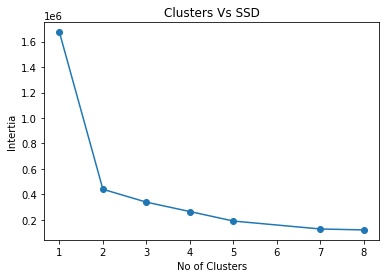

In [12]:
plt.plot(range_n_clusters,ssd1, marker='o')
plt.title('Clusters Vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')

Analysis

    elbow plot pointing at 5-cluster k-means

In [13]:
kmeans1 = KMeansSelf(n_clusters = 5, random_state = 1)
pred1 = kmeans1.fit_predict(X)

In [19]:
pred1=np.array(pred1)
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [15]:
kmeans1.cluster_centers_ = [list(ele) for ele in kmeans1.cluster_centers_]

In [16]:
kmeans1.cluster_centers_=np.array(kmeans1.cluster_centers_)

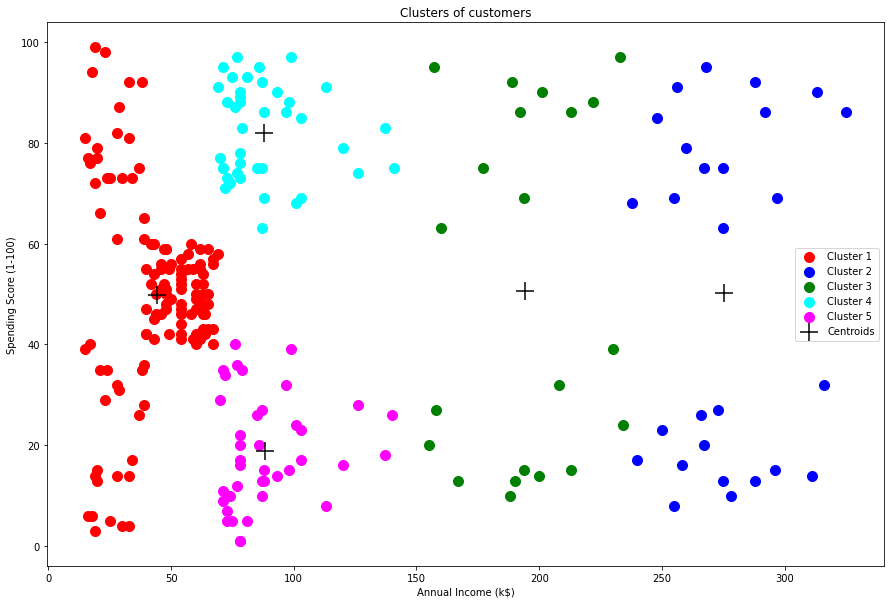

In [18]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[pred1 == 0, 0], X[pred1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred1 == 1, 0], X[pred1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred1 == 2, 0], X[pred1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[pred1 == 3, 0], X[pred1 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[pred1 == 4, 0], X[pred1 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 300, c = 'black', marker="+", label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Model Interpretation

    Cluster 1 (Red Color) -> earning less but spending more
    cluster 2 (Blue Color) -> earning high but spending less
    cluster 3 (Green Color) -> average in terms of earning and spending
    cluster 4 (cyan Color) -> earning high and also spending high
    Cluster 5 (magenta Color) -> Earning less , spending less